<a href="https://colab.research.google.com/github/axlaalq/Nutrional-DB-ML-model/blob/main/back/axl_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import data_table
data_table.enable_dataframe_formatter()

finances = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/axl/axl.xlsx', sheet_name='finances')
finances = finances.rename(columns={'Fecha': 'date', 'Nombre': 'name','Tipo':'type','Cantidad':'quantity','Total':'total'})
finances['date'] = pd.to_datetime(finances['date'], format='%d-%m-%Y').astype('datetime64[ns]')
finances['type'] = finances['type'].astype('category')
finances[['quantity','total']] = finances[['quantity','total']].astype('float')
finances=finances.sort_values(by='date')
finances['week'] = finances['date'].dt.to_period('W')

import numpy as np
finances['total'] = np.where(finances['type'] != 'Ingreso', -finances['total'], finances['total'])

In [4]:
finances

,date,name,type,quantity,total,week
27,2025-01-19,Pan dulce,Comida rápida,2.00,-56.00,2025-01-13/2025-01-19
34,2025-01-24,NaN,Otros,1.00,-19.00,2025-01-20/2025-01-26
35,2025-01-24,NaN,Otros,1.00,-63.00,2025-01-20/2025-01-26
38,2025-01-24,Tacos,Salida,20.00,-234.00,2025-01-20/2025-01-26
32,2025-01-26,Renta,Mensualidades,2.00,-2900.00,2025-01-20/2025-01-26
28,2025-01-28,Dispensador,Hogar,1.00,-222.50,2025-01-27/2025-02-02
30,2025-01-29,Nomina,Ingreso,1.00,8074.96,2025-01-27/2025-02-02
40,2025-01-30,Nabucco,T,1.00,-426.80,2025-01-27/2025-02-02
56,2025-01-31,Fogon,T,1.00,-1200.00,2025-01-27/2025-02-02
41,2025-02-01,La llave,T,1.00,-644.60,2025-01-27/2025-02-02


In [5]:
class Finance:
  def __init__(self, df):
    self.df = df
    negative_totals_df = df[df['type'] != 'Ingreso'].copy()
    negative_totals_df['total'] = -negative_totals_df['total']
    self.outcomes=negative_totals_df
  def get_df(self):
    return self.df
  def add_row(self, new_row):
    if len(new_row) != len(self.df.columns):
      raise ValueError("The new row must have the same number of elements as the DataFrame columns.")
    for i, col in enumerate(self.df.columns):
      if col == 'date':
        try:
          pd.to_datetime(new_row[i], format='%d-%m-%Y')
        except ValueError:
          raise ValueError(f"Invalid date format for column 'date'. Expected dd-mm-yyyy, got {new_row[i]}")
        new_row[i] = pd.to_datetime(new_row[i], format='%d-%m-%Y')
      elif col == 'type':
        if new_row[i] not in ['Purchase', 'Sale']:
          raise ValueError(f"Invalid category for column 'type'. Expected 'Purchase' or 'Sale', got {new_row[i]}")
        new_row[i] = new_row[i]
      elif not isinstance(new_row[i], type(self.df[col].iloc[0])):
        try:
          new_row[i] = type(self.df[col].iloc[0])(new_row[i])
        except ValueError:
            raise ValueError(f"Data type mismatch for column '{col}'. Expected {type(self.df[col].iloc[0])}, got {type(new_row[i])}")
        except TypeError:
            raise ValueError(f"Data type mismatch for column '{col}'. Expected {type(self.df[col].iloc[0])}, got {type(new_row[i])}")

    new_df = pd.DataFrame([new_row], columns=self.df.columns)
    new_df['date'] = pd.to_datetime(new_df['date'], format='%d-%m-%Y').astype('datetime64[ns]')
    new_df['type'] = new_df['type'].astype('category')
    self.df = pd.concat([self.df, new_df], ignore_index=True)
  def edit_row(self, row_id, column_name, new_value):
    if not isinstance(row_id, int) or row_id < 0 or row_id >= len(self.df):
        print("Invalid row_id")
    if column_name not in self.df.columns:
        print("Invalid column_name")
    if column_name == 'date':
      try:
        pd.to_datetime(new_value, format='%d-%m-%Y')
      except ValueError:
        print(f"Invalid date format for column 'date'. Expected dd-mm-yyyy, got {new_value}")
      new_value = pd.to_datetime(new_value, format='%d-%m-%Y')
    elif column_name == 'type':
      if new_value not in ['Purchase', 'Sale']:
        print(f"Invalid category for column 'type'. Expected 'Purchase' or 'Sale', got {new_value}")
    elif not isinstance(new_value, type(self.df[column_name].iloc[0])):
      try:
        new_value = type(self.df[column_name].iloc[0])(new_value)
      except ValueError:
          print(f"Data type mismatch for column '{column_name}'. Expected {type(self.df[column_name].iloc[0])}, got {type(new_value)}") # Changed df to self.df
      except TypeError:
          print(f"Data type mismatch for column '{column_name}'. Expected {type(self.df[column_name].iloc[0])}, got {type(new_value)}") # Changed df to self.df
    self.df.loc[row_id, column_name] = new_value
  def pieplot(self):
    type_totals = self.outcomes.groupby('type', observed=False)['total'].sum()
    type_totals = type_totals.drop('Ingreso')

    palette_color = sns.color_palette('dark')
    percentages = (type_totals / type_totals.sum()) * 100
    wedges, texts = plt.pie(type_totals,  colors=palette_color, autopct=None, textprops={'fontsize': 10}) #removed autopct and autotexts


    legend_labels = [f'{label}' for label in type_totals.index] #added labels to legend
    plt.legend(wedges, legend_labels, loc="lower right")
    total_sum = type_totals.sum()
    plt.show()
    plt.clf()
    type_totals = pd.DataFrame({'total': type_totals, 'percentage': percentages})
    return type_totals, total_sum
  def plot_weekly(self):
    weekly_type_totals = self.outcomes.groupby(['week', 'type'], observed=False)['total'].sum().unstack()
    print(weekly_type_totals.columns)
    ax = weekly_type_totals.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.xlabel('Week Number')
    plt.ylabel('Total (mxn)')
    plt.title('Total Finances per Week')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Type')
    plt.tight_layout()
    plt.show()
    plt.clf()
    return weekly_type_totals
  def total_revenue(self):
    daily_sums = self.df.groupby('date')['total'].sum()
    cumulative_sums = daily_sums.cumsum()
    plt.figure(figsize=(10, 6))
    dat1= [str(d)[:-8] for d in daily_sums.index]
    dat2= [x for x in cumulative_sums.values]
    plt.plot(dat1, dat2)
    plt.xlabel('Date')
    plt.ylabel('Revenue (mxn)')
    plt.title('Total Revenue')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.clf()
fin=Finance(finances)


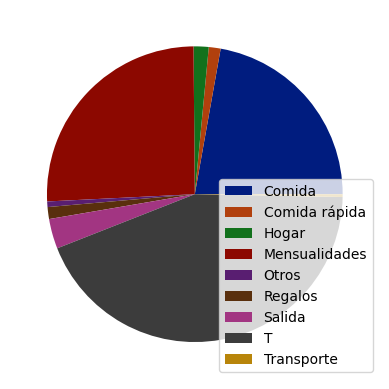

(                 total  percentage
 type                              
 Comida         3002.39   22.197701
 Comida rápida   175.00    1.293835
 Hogar           222.50    1.645019
 Mensualidades  3469.00   25.647509
 Otros            82.00    0.606254
 Regalos         176.00    1.301228
 Salida          443.00    3.275251
 T              5914.62   43.728818
 Transporte       41.17    0.304384,
 13525.679999999998)

<Figure size 640x480 with 0 Axes>

In [6]:
fin.pieplot()

CategoricalIndex(['Comida', 'Comida rápida', 'Hogar', 'Ingreso',
                  'Mensualidades', 'Otros', 'Regalos', 'Salida', 'T',
                  'Transporte'],
                 categories=['Comida', 'Comida rápida', 'Hogar', 'Ingreso', ..., 'Regalos', 'Salida', 'T', 'Transporte'], ordered=False, dtype='category', name='type')


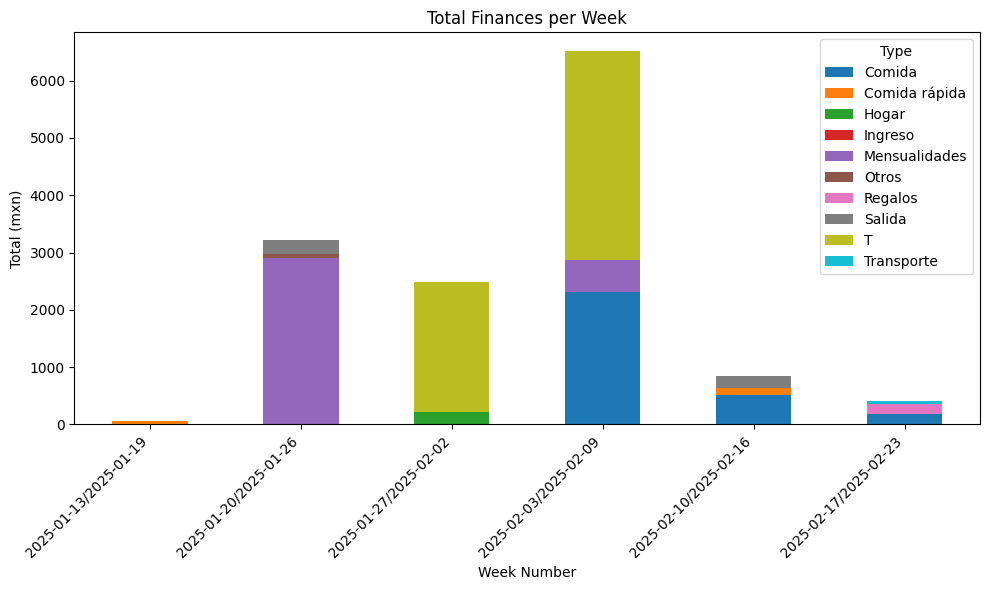

type,Comida,Comida rápida,Hogar,Ingreso,Mensualidades,Otros,Regalos,Salida,T,Transporte
week,,,,,,,,,,
2025-01-13/2025-01-19,0.00,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
2025-01-20/2025-01-26,0.00,0.0,0.0,0.0,2900.0,82.0,0.0,234.0,0.00,0.00
2025-01-27/2025-02-02,0.00,0.0,222.5,0.0,0.0,0.0,0.0,0.0,2271.40,0.00
2025-02-03/2025-02-09,2306.63,0.0,0.0,0.0,569.0,0.0,0.0,0.0,3643.22,0.00
2025-02-10/2025-02-16,510.90,119.0,0.0,0.0,0.0,0.0,0.0,209.0,0.00,0.00
2025-02-17/2025-02-23,184.86,0.0,0.0,0.0,0.0,0.0,176.0,0.0,0.00,41.17


<Figure size 640x480 with 0 Axes>

In [8]:
fin.plot_weekly()

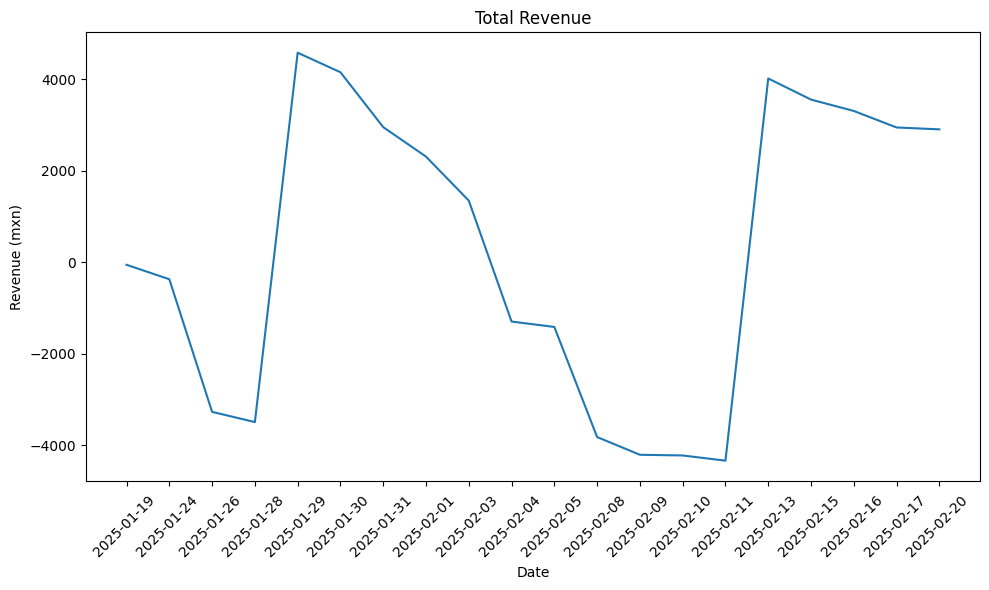

<Figure size 640x480 with 0 Axes>

In [9]:
fin.total_revenue()

In [11]:
food_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/axl/axl.xlsx', sheet_name='food_data')
food_data


,Nombre,Precio por empaque,Unidad,Unidades por empaque,Porción (unidades),Calorías,Proteína (g),Carbohidratos (g),Grasas (g)
0,Pechuga de pollo (c/hueso),150.0,kg,1.00,0.100,165.0,31.00,0.00,3.60
1,Leche Lala 100,40.0,l,1.00,0.250,110.0,13.50,8.40,2.50
2,Carne molida mixta,200.0,kg,1.00,0.100,206.0,18.00,0.10,16.00
3,Proteína Whey,1619.0,kg,2.27,0.032,513.0,24.00,4.00,1.00
4,Arrachera (cerdo),130.0,kg,1.00,0.100,106.0,23.80,1.20,3.00
5,Mantequilla,30.0,kg,0.09,0.090,743.0,0.30,0.00,81.20
6,Tacos,13.0,Taco,1.00,1.000,93.0,5.00,4.73,6.12
7,Chorizo argentino,110.0,kg,1.00,0.100,319.0,17.79,1.53,26.14
8,Plátano,24.0,kg,1.00,0.130,116.0,1.40,29.70,0.40
9,Agua,15.0,l,20.00,1.000,0.0,0.00,0.00,0.00


In [12]:
def receta(name, lista_ingredientes, food_data):
  resultados = []
  price = 0  # Initialize price to 0 before the loop
  cal = 0   # Initialize cal to 0 before the loop
  p = 0    # Initialize p to 0 before the loop
  c = 0    # Initialize c to 0 before the loop
  f = 0    # Initialize f to 0 before the loop

  for ingrediente, cantidad in lista_ingredientes:
    # Busca el ingrediente en el DataFrame food_data (asegúrate de que la columna que contiene
    # los nombres de los alimentos se llame 'Nombre' o cambia el nombre de la columna en la siguiente línea)
    ingrediente_info = food_data[food_data['Nombre'] == ingrediente]

    if ingrediente_info.empty:
      print(f"El ingrediente '{ingrediente}' no se encontró en la base de datos.")
      return None  # Devuelve None si no se encuentra un ingrediente

    # Obtiene los valores de las columnas deseadas
    price += ingrediente_info['Precio por empaque'].iloc[0]*(cantidad/ingrediente_info['Unidades por empaque'].iloc[0])
    porcion=cantidad/ingrediente_info['Porción (unidades)'].iloc[0]
    cal += porcion*ingrediente_info['Calorías'].iloc[0]
    p += porcion*ingrediente_info['Proteína (g)'].iloc[0]
    c += porcion*ingrediente_info['Carbohidratos (g)'].iloc[0]
    f += porcion*ingrediente_info['Grasas (g)'].iloc[0]

  resultados={
      'Name': name,
      'Precio': price,
      'Calorias': cal,
      'Proteina': p,
      'Carbohidratos': c,
      'Grasas': f
  }
  return resultados
receta('Licuado de proteína', [('Leche Lala 100',0.50),('Proteína Whey',0.032),('Plátano',0.13)],food_data)

{'Name': 'Licuado de proteína',
 'Precio': 45.94290748898678,
 'Calorias': 849.0,
 'Proteina': 52.4,
 'Carbohidratos': 50.5,
 'Grasas': 6.4}